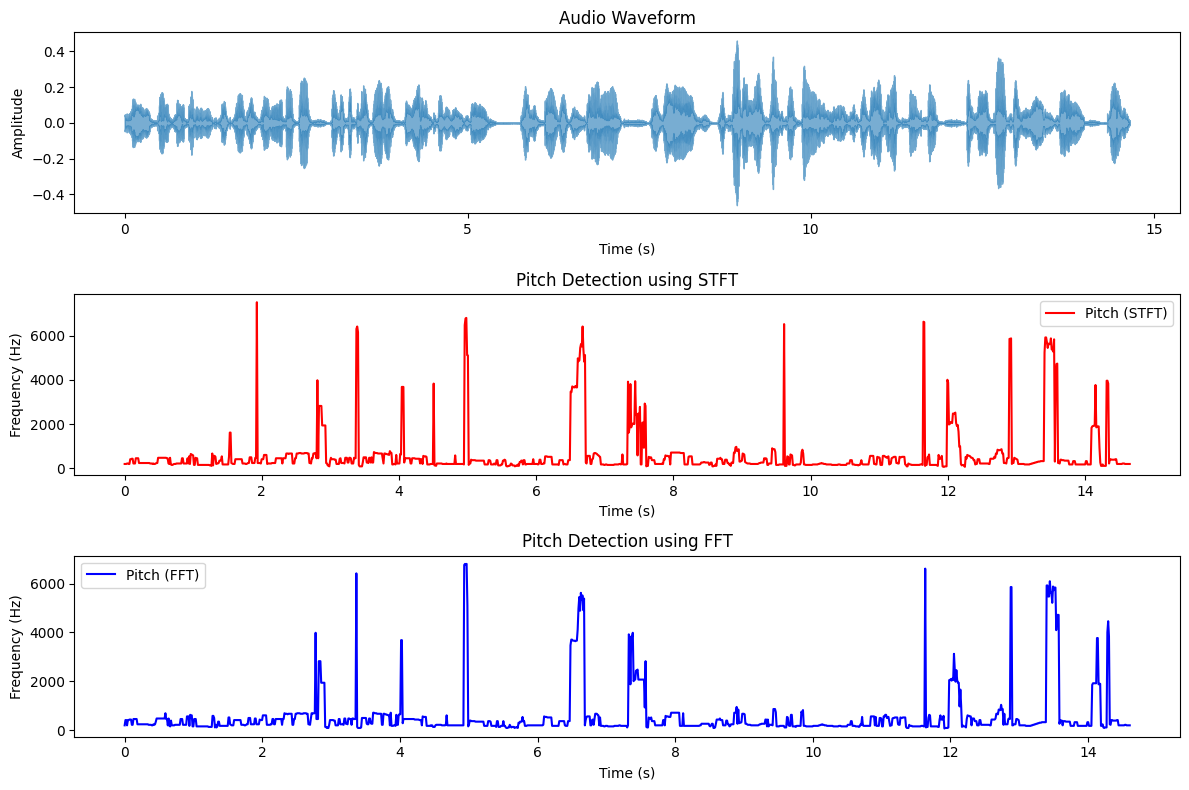

In [3]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio file
audio_file = './Data/speech_5.wav'  # Replace with your file path
y, sr = librosa.load(audio_file, sr=None)

# Parameters for STFT
n_fft = 2048  # Number of FFT points
hop_length = 512  # Hop length for overlapping frames

# Compute the STFT
stft = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
magnitude = np.abs(stft)

# Get the frequency bins
frequencies = librosa.fft_frequencies(sr=sr, n_fft=n_fft)

# Detect pitch using STFT
pitch_stft = []
for frame in magnitude.T:
    max_idx = np.argmax(frame)  # Find the index of the max magnitude
    pitch_freq = frequencies[max_idx]  # Map index to frequency
    pitch_stft.append(pitch_freq)

# Detect pitch using FFT (simpler technique)
frame_size = 2048  # Frame size for FFT
hop_length_fft = 512  # Hop length for FFT
pitch_fft = []
for i in range(0, len(y) - frame_size, hop_length_fft):
    frame = y[i:i + frame_size]
    fft_spectrum = np.fft.rfft(frame)
    fft_magnitude = np.abs(fft_spectrum)
    fft_frequencies = np.fft.rfftfreq(len(frame), d=1/sr)
    max_idx = np.argmax(fft_magnitude)  # Find the index of the max magnitude
    pitch_freq = fft_frequencies[max_idx]  # Map index to frequency
    pitch_fft.append(pitch_freq)

# Time axes for both methods
times_stft = librosa.frames_to_time(np.arange(len(pitch_stft)), sr=sr, hop_length=hop_length)
times_fft = np.arange(len(pitch_fft)) * hop_length_fft / sr

# Plot the results
plt.figure(figsize=(12, 8))

# Plot the waveform
plt.subplot(3, 1, 1)
librosa.display.waveshow(y, sr=sr, alpha=0.6)
plt.title('Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot pitch detected using STFT
plt.subplot(3, 1, 2)
plt.plot(times_stft, pitch_stft, label='Pitch (STFT)', color='r')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Pitch Detection using STFT')
plt.legend()

# Plot pitch detected using FFT
plt.subplot(3, 1, 3)
plt.plot(times_fft, pitch_fft, label='Pitch (FFT)', color='b')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Pitch Detection using FFT')
plt.legend()

plt.tight_layout()
plt.show()